In [1]:
import os
os.environ['OMP_NUM_THREADS'] = '1'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

In [2]:
pd.options.display.max_columns = 999
pd.options.display.min_rows = 999

In [7]:
csv_in = '../../../cs3-2023/cs3-2023/cs3-02/wholesale_customers.csv'
df = pd.read_csv(csv_in,sep=',',skiprows=13,header=0)
print(df.shape)
print(df.info())
display(df.head())

(440, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Channel           440 non-null    int64 
 1   Region            440 non-null    object
 2   Fresh             440 non-null    int64 
 3   Milk              440 non-null    int64 
 4   Grocery           440 non-null    int64 
 5   Frozen            440 non-null    int64 
 6   Detergents_Paper  440 non-null    int64 
 7   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 27.6+ KB
None


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,Other,12669,9656,7561,214,2674,1338
1,2,Other,7057,9810,9568,1762,3293,1776
2,2,Other,6353,8808,7684,2405,3516,7844
3,1,Other,13265,1196,4221,6404,507,1788
4,2,Other,22615,5410,7198,3915,1777,5185


In [8]:
dfX = df[['Frozen','Detergents_Paper']]
display(dfX.head())

,Frozen,Detergents_Paper
0,214,2674
1,1762,3293
2,2405,3516
3,6404,507
4,3915,1777


In [9]:
X_scaled = scale(dfX)

In [10]:
print(X_scaled.mean(axis=0))
print(X_scaled.std(ddof=0,axis=0))

[3.63345717e-17 2.42230478e-17]
[1. 1.]


In [12]:
print(type(X_scaled))
print(X_scaled[:5])

<class 'numpy.ndarray'>
[[-0.58936716 -0.04356873]
 [-0.27013618  0.08640684]
 [-0.13753572  0.13323164]
 [ 0.6871443  -0.49858822]
 [ 0.17385884 -0.23191782]]


In [13]:
dfX_scaled = pd.DataFrame(X_scaled,columns=dfX.columns)
print(type(dfX_scaled))
display(dfX_scaled.head())

<class 'pandas.core.frame.DataFrame'>


,Frozen,Detergents_Paper
0,-0.589367,-0.043569
1,-0.270136,0.086407
2,-0.137536,0.133232
3,0.687144,-0.498588
4,0.173859,-0.231918


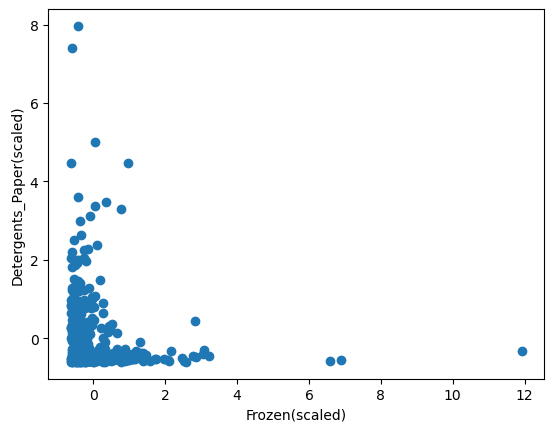

In [14]:
plt.scatter(dfX_scaled['Frozen'],dfX_scaled['Detergents_Paper'],marker='o')
plt.xlabel('Frozen(scaled)')
plt.ylabel('Detergents_Paper(scaled)')
plt.show()

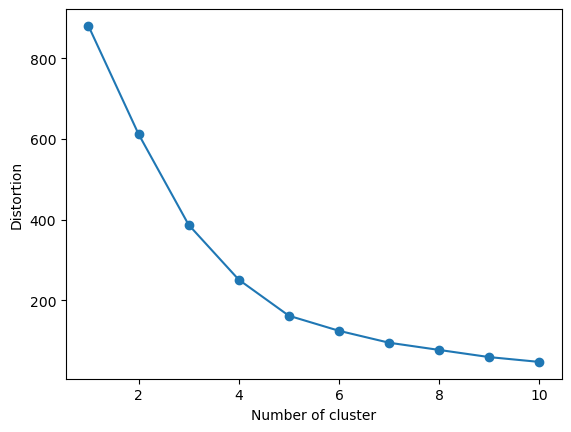

In [15]:
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters=i,n_init=10)
    km.fit(dfX_scaled)
    distortions.append(km.inertia_)
plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of cluster')
plt.ylabel('Distortion')
plt.show()

In [16]:
n_cls = 3
km = KMeans(n_clusters=n_cls,n_init=10,random_state=10)
cls = km.fit_predict(dfX_scaled)
print(cls)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 2 1 1 1 1 1 1 1 1 1 2 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 0 1 1 1 1 1 2 1 0 1 1 1 1 1 1 0 1 1 1 1 1 2 1 1 1 1 1 0 1
 0 2 1 1 1 2 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 2 1 1 1 2 1 0 1 1]


In [17]:
df['cluster_no'] = cls
display(df.head())

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,cluster_no
0,2,Other,12669,9656,7561,214,2674,1338,1
1,2,Other,7057,9810,9568,1762,3293,1776,1
2,2,Other,6353,8808,7684,2405,3516,7844,1
3,1,Other,13265,1196,4221,6404,507,1788,1
4,2,Other,22615,5410,7198,3915,1777,5185,1


In [18]:
print(df['cluster_no'].value_counts())

1    385
0     37
2     18
Name: cluster_no, dtype: int64


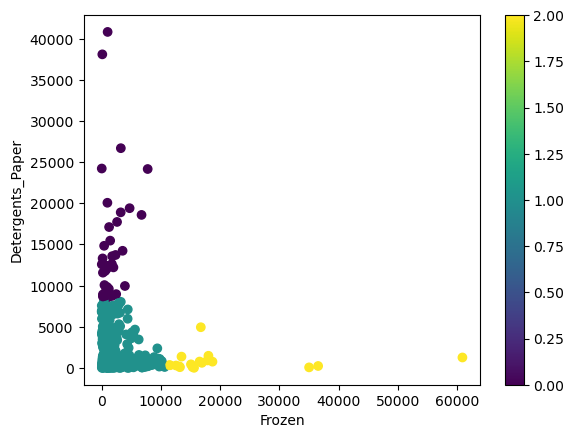

In [19]:
plt.scatter(df['Frozen'],df['Detergents_Paper'],marker='o',c=df['cluster_no'])
plt.colorbar()
plt.xlabel('Frozen')
plt.ylabel('Detergents_Paper')
plt.show()

In [20]:
print(km.cluster_centers_)

[[-0.27680215  2.57116319]
 [-0.13588434 -0.22659423]
 [ 3.47539726 -0.43856989]]


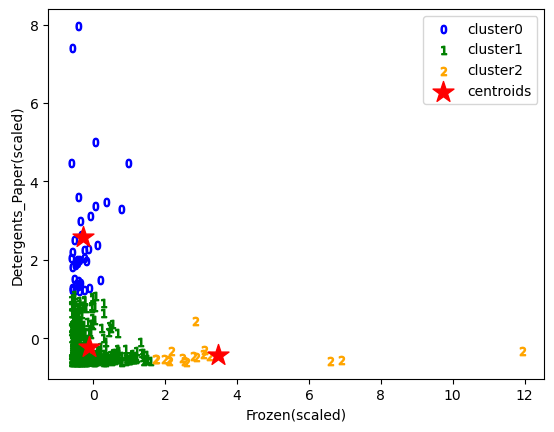

In [21]:
colors = ['blue','green','orange']
for i in range(n_cls):
    df_cls = dfX_scaled[df['cluster_no']==i]
    plt.scatter(df_cls['Frozen'],df_cls['Detergents_Paper'],color=colors[i],marker='${}$'.format(i),label='cluster{}'.format(i))
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=250,marker='*',color='red',label='centroids')
plt.xlabel('Frozen(scaled)')
plt.ylabel('Detergents_Paper(scaled)')
plt.legend()
plt.show()